# Assignment 5

In this assignment, we will use web scraping to automate the process of getting data from the CORGIS website and visualizing it.
* You can add any number of extra code cells below that you want.

In the cell below:
* Use `requests`, `BeautifulSoup`, and the site name "https://corgis-edu.github.io/corgis/csv/" to make a Python list of all the CORGIS dataset names.
* The relevant HTML tag to search for is "h3"
  * On your own, look the page source of the above link and identify why it makes sense to search for the \<h3\> tags in the page
* When you have your list, print it out.  The output should be the following:
    * `['Aids', 'Airlines', 'Astronauts', 'Billionaires', 'Broadway', 'Business Dynamics', 'Cancer', 'Cars', 'Classics', 'Coffee', 'Construction Permits', 'Construction Spending', 'Consumer Price Index', 'County Demographics', 'Covid', 'Covid Behaviors', 'Covid Mobility', 'Drugs', 'Earthquakes', 'Election', 'Electricity', 'Emissions', 'Energy', 'Finance', 'Food', 'Food Access', 'Global Development', 'Global Emissions', 'Graduates', 'Health', 'Hospitals', 'Hydropower', 'Ingredients', 'Injuries', 'Labor', 'Medal Of Honor', 'Monkeypox', 'Music', 'Nuclear Explosions', 'Opioids', 'Parking Citations', 'Police Shootings', 'Publishers', 'Real Estate', 'Retail Services', 'School Scores', 'Skyscrapers', 'Slavery', 'Smoking', 'State Crime', 'State Demographics', 'State Fragility', 'Suicide Attacks', 'Super Bowl Ads', 'Supreme Court', 'Tate', 'Ufo Sightings', 'Video Games', 'Weather', 'Wind Turbines']`

In [5]:
import requests
from bs4 import BeautifulSoup

response = requests.get('https://corgis-edu.github.io/corgis/csv/')
html_string = response.text
document = BeautifulSoup(html_string, "html.parser")
names = []
for i in document.find_all('h3'):
  names.append(i.text)
print(names)

['Aids', 'Airlines', 'Astronauts', 'Billionaires', 'Broadway', 'Business Dynamics', 'Cancer', 'Cars', 'Classics', 'Coffee', 'Construction Permits', 'Construction Spending', 'Consumer Price Index', 'County Demographics', 'Covid', 'Covid Behaviors', 'Covid Mobility', 'Drugs', 'Earthquakes', 'Election', 'Electricity', 'Emissions', 'Energy', 'Finance', 'Food', 'Food Access', 'Global Development', 'Global Emissions', 'Graduates', 'Health', 'Hospitals', 'Hydropower', 'Ingredients', 'Injuries', 'Labor', 'Medal Of Honor', 'Monkeypox', 'Music', 'Nuclear Explosions', 'Opioids', 'Parking Citations', 'Police Shootings', 'Publishers', 'Real Estate', 'Retail Services', 'School Scores', 'Skyscrapers', 'Slavery', 'Smoking', 'State Crime', 'State Demographics', 'State Fragility', 'Suicide Attacks', 'Super Bowl Ads', 'Supreme Court', 'Tate', 'Ufo Sightings', 'Video Games', 'Weather', 'Wind Turbines']


Write a function that takes an element from your list of CORGIS datasets, searches the respective CORGIS page for the CSV download link, and returns a Pandas dataframe.

Hints:
* If I hypothetically defined a function with `def pdcorgis(a):` and wanted to call this `pdcorgis` function with Python code like `classics_data = pdcorgis("Classics")`, then an example flow of Python commands inside the function could be:
  1. Convert "Classics" to lowercase (using the `lower()` method)
    * I would technically use `a.lower()` because I would be doing this with my input variable `a`, but I am using "Classics" here to explain the functionality
  1. Get the HTML code from the website using `requests` with the appropriate website name, which here would be "https://corgis-edu.github.io/corgis/csv/" plus the string "classics" plus the string "/" 
  1. Use `BeautifulSoup` to search for all the HTML link elements on that page (links have the tag "a")
  1. For any link element (which here I'll call "i"), check if `i.has_attr('download')` is true, and if it is, then store the value of `i['href']` in a variable to use as part of the download link for the csv file
  1. The complete download link for the file will be "https://corgis-edu.github.io/corgis/csv/" plus the string "classics" plus the string "/" plus the string stored in the result you found for `i['href']`
  1. Use `pd.read_csv()` to read data stored at the download link for the csv file; assign the resulting dataframe to a variable
  1. Use a return statement to return the dataframe when someone calls your function.
    * If I saved the dataframe as the variable `corgisdf`, I would use `return corgisdf` at the end of my function
    

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def pdcorgis(b):
  #lowercase b
  b=b.lower()
  
  #make the main_url to contain b and /
  main_url ="https://corgis-edu.github.io/corgis/csv/" + b + "/"
  response = requests.get(main_url)
  html_string = response.text
  document = BeautifulSoup(html_string, "html.parser")
  
  #find all the a 
  tags = document.find_all('a')
  # iterate through the 'a's
  for i in tags:
    if i.has_attr('download'):
      # store the link
      c = i['href']
      #update the final link 
      final_link= main_url + c
      #read the csv file
      df= pd.read_csv(final_link)
      return df 


pdcorgis("Classics")




,bibliography.congress classifications,bibliography.languages,bibliography.subjects,bibliography.title,bibliography.type,metadata.downloads,metadata.id,metadata.rank,metadata.url,bibliography.author.birth,...,metrics.sentiments.polarity,metrics.sentiments.subjectivity,metrics.statistics.average letter per word,metrics.statistics.average sentence length,metrics.statistics.average sentence per word,metrics.statistics.characters,metrics.statistics.polysyllables,metrics.statistics.sentences,metrics.statistics.syllables,metrics.statistics.words
0,PR,en,"Sisters -- Fiction,Courtship -- Fiction,Social...",Pride and Prejudice,Text,36576,1342,1,https://www.gutenberg.org/ebooks/1342,1775,...,0.136713,0.522239,4.83,18.0,0.05,586794,4603,6511,170648.1,121533
1,PS,en,"Mentally ill women -- Fiction,Feminist fiction...",The Yellow Wallpaper,Text,26363,1952,2,https://www.gutenberg.org/ebooks/1952,1860,...,0.054174,0.534787,4.41,15.0,0.06,26769,102,385,7686.9,6067
2,"PZ,PR",en,Fantasy,Alice's Adventures in Wonderland,Text,18882,11,3,https://www.gutenberg.org/ebooks/11,1832,...,0.041079,0.497276,4.65,17.0,0.06,122719,339,1501,33810.3,26389
3,PR,en,Monsters -- Fiction;Frankenstein's monster (Fi...,"Frankenstein; Or, The Modern Prometheus",Text,17128,84,4,https://www.gutenberg.org/ebooks/84,1797,...,0.100902,0.539516,4.77,23.0,0.04,357604,2604,3239,106802.1,74959
4,PT,en,"Psychological fiction,Metamorphosis -- Fiction",Metamorphosis,Text,15683,5200,5,https://www.gutenberg.org/ebooks/5200,1883,...,0.041997,0.479019,4.56,27.0,0.04,100372,397,800,28752.3,22022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,NaN,en,NaN,The Reluctant Heroes,Text,0,51483,1002,https://www.gutenberg.org/ebooks/51483,1926,...,0.076203,0.451757,4.68,11.0,0.09,32354,112,618,8824.5,6913
1002,NaN,en,NaN,"Film Truth; September, 1920",Text,0,51484,1003,https://www.gutenberg.org/ebooks/51484,0,...,0.143879,0.485782,5.02,17.0,0.06,45970,312,536,13080.6,9153
1003,NaN,en,NaN,Othmar,Text,0,51487,1004,https://www.gutenberg.org/ebooks/51487,1839,...,0.099478,0.548289,4.66,21.0,0.05,890918,4808,8921,258091.2,191182
1004,NaN,en,NaN,Church History (Volumes 1-3),Text,0,51491,1005,https://www.gutenberg.org/ebooks/51491,1809,...,0.112242,0.440014,5.31,17.0,0.06,3883244,46730,41950,1083170.7,730715


Confirm that your function works for an arbitrary element of your list of CORGIS datasets.  
* For example:  if your list of CORGIS datasets is `corgis_list` and your function name is `pdcorgis`, then executing `pdcorgis(corgis_list[0]).head()` will output the first five rows of the dataset corresponding to `corgis_list[0]`, the first name in your list

You can include any code/output for checking this that you want, but for the final result, you should at least confirm that executing `pdcorgis(corgis_list[0]).head()` gives reasonable output (where `pdcorgis` and `corgis_list` are changed to your own function name and list name as needed).

In [7]:
pdcorgis(names[0]).head()




,Country,Year,Data.AIDS-Related Deaths.AIDS Orphans,Data.AIDS-Related Deaths.Adults,Data.AIDS-Related Deaths.All Ages,Data.AIDS-Related Deaths.Children,Data.AIDS-Related Deaths.Female Adults,Data.AIDS-Related Deaths.Male Adults,Data.HIV Prevalence.Adults,Data.HIV Prevalence.Young Men,...,Data.New HIV Infections.Female Adults,Data.New HIV Infections.Children,Data.New HIV Infections.All Ages,Data.New HIV Infections.Adults,Data.New HIV Infections.Incidence Rate Among Adults,Data.People Living with HIV.Total,Data.People Living with HIV.Male Adults,Data.People Living with HIV.Female Adults,Data.People Living with HIV.Children,Data.People Living with HIV.Adults
0,Afghanistan,1990,100,100,100,100,100,100,0.1,0.1,...,100,100,100,100,0.01,500,500,100,100,500
1,Algeria,1990,200,100,100,100,100,100,0.1,0.1,...,100,100,100,100,0.01,500,500,200,100,500
2,Angola,1990,1300,500,1000,500,200,200,0.2,0.1,...,1700,1000,3400,2800,0.47,12000,4600,6100,1100,11000
3,Argentina,1990,500,200,500,100,100,200,0.1,0.1,...,1200,200,4500,4400,0.19,13000,9100,3700,200,13000
4,Armenia,1990,100,100,100,100,100,100,0.1,0.1,...,100,100,100,100,0.01,100,100,100,100,100


Look at the list of dataset names, and choose 3 datasets for visualization.  

* Make a line plot with your first choice
* Make a bar plot with your second choice
* Make a histogram plot with your third choice

Notes:
* You should use your list of dataset names and your function defined above to retrieve the data needed for visualization.
* All plots should present a visualization that is reasonably understandable (no zigzagging lines in a chaotic mess, there should not be a large number of overlapping labels, and etc)
* You will likely find it useful to first use the `head()` method to get a quick idea of what data is stored in each dataframe.
* Depending on your data, you may want to subset your data before making any plot.
* Remember that bar plots have categorical data on the horizontal axis.

     bibliography.congress classifications bibliography.languages  \
0                                       PR                     en   
1                                       PS                     en   
2                                    PZ,PR                     en   
3                                       PR                     en   
4                                       PT                     en   
...                                    ...                    ...   
1001                                   NaN                     en   
1002                                   NaN                     en   
1003                                   NaN                     en   
1004                                   NaN                     en   
1005                                   NaN                     en   

                                  bibliography.subjects  \
0     Sisters -- Fiction,Courtship -- Fiction,Social...   
1     Mentally ill women -- Fiction,Feminist fiction.

<AxesSubplot: ylabel='Frequency'>

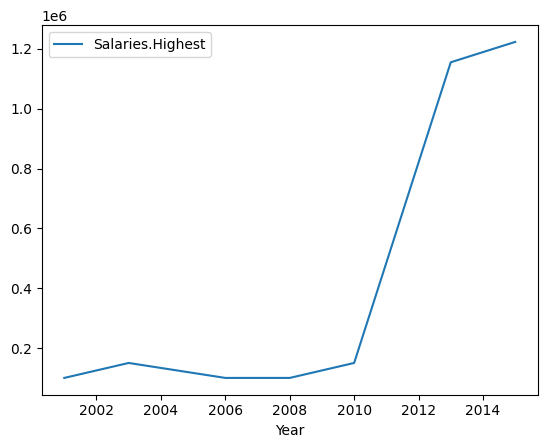

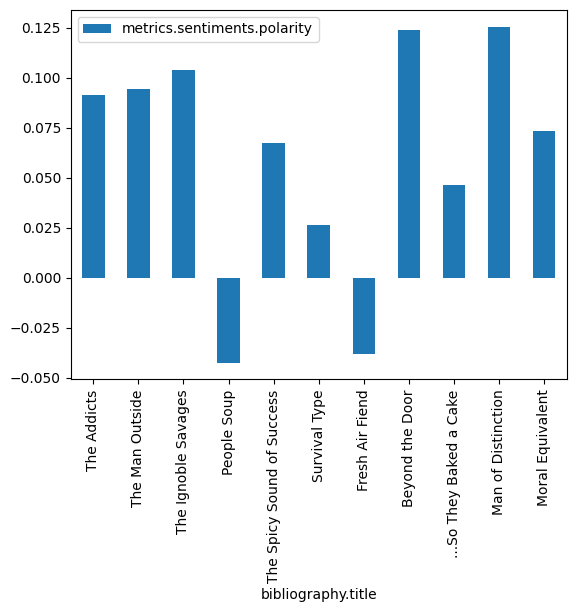

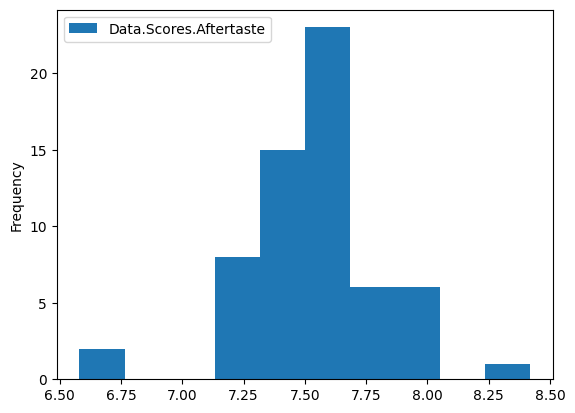

In [8]:
data1= pdcorgis("Graduates")
line= data1.loc[(data1['Year']>2000)&(data1['Education.Major']=='Chemistry')]
line.plot(y='Salaries.Highest', x='Year', kind='line')
 
data2=pdcorgis("Classics")
print(data2)
bar= data2.loc[(data2['bibliography.languages']=='en')&(data2['metrics.sentiments.subjectivity']>0.5)&(data2['bibliography.author.birth']>1900)]
bar.plot(y='metrics.sentiments.polarity', x='bibliography.title', kind='bar')

data3=pdcorgis("Coffee")
hist= data3.loc[(data3['Location.Country']=='Brazil')]
hist.plot(y='Data.Scores.Aftertaste', x='Data.Scores.Acidity', kind='hist')


# Submit
Submit this assignment by:

* Saving your work
* Clicking on the Submit button at the top